## Day 1 Homework
## Muhammad Mahmoud Siddik
## Track: AI (Group 2)

If we have the data points (x_points, y_points) with x_points = [1,1,2,3,4,5,6,7,8,9,10,11]

and y_points = [1,2,3,1,4,5,6,4,7,10,15,9],

use the GD algorithm to find the best values for theta0 and theta1 
(having y = theta0 + theta1*x the equation of a line that should fit the data points).

In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Defining the Matrecies 
x1 = np.array([[1],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11]]) 

x_points = np.insert(x1,0,np.ones(12),axis=1)

y_points = np.array([[1],[2],[3],[1],[4],[5],[6],[4],[7],[10],[15],[9]])

theta = np.matrix(np.array([0,0])) 


In [21]:
# cost function
def ComputeCost(X,y,theta):
    
    z = np.power(((X * theta.T) - y),2)
    
    return np.sum(z) / (2 * len(X))

print(f"ComputeCost(X,y,theta) = {ComputeCost(x_points,y_points,theta)}")

ComputeCost(X,y,theta) = 23.458333333333332


In [22]:
# GD function
def GradientDescent(X,y,theta,alpha,iters):
    
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = ComputeCost(X, y, theta)
        
    return theta, cost


In [28]:
# initialize variables for learning rate and iterations
alpha = 0.005

iters = 1200

In [29]:
# perform gradient desent to fit the model parameters
new_theta, cost = GradientDescent(x_points,y_points,theta,alpha,iters)
print(f"new theta = {new_theta}\n")
# print(f"cost = {cost}\n")
print(f"ComputeCost = {ComputeCost(x_points,y_points,new_theta)}")

new theta = [[0.17353766 0.96891863]]

ComputeCost = 1.9349674209892678


In [30]:
x =np.linspace(x_points.min(),x_points.max(),100)
f = new_theta[0,0] + (new_theta[0,1] * x)

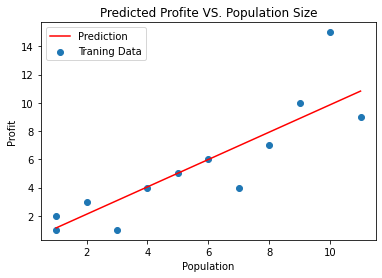

In [31]:
#draw the line
plt.plot(x,f,'r',label='Prediction')
plt.scatter(x1,y_points,label='Traning Data')
plt.legend()
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Predicted Profite VS. Population Size')
plt.show()

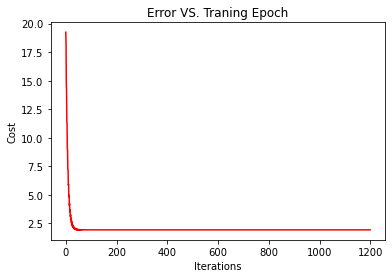

In [32]:
# draw error graph
plt.plot(np.arange(iters),cost,'r')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Error VS. Traning Epoch")
plt.show()